# Fruit Recognition using TensorFlow

In [2]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
import os

dataset_path = r'F:\python\tensorflow project\FIDS30\FIDS30'

# List fruit categories (folders) in the dataset folder
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print(f"Found categories: {categories}")

# Count images per category
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))])
    print(f"{category}: {num_images} images")


Found categories: ['acerolas', 'apples', 'apricots', 'avocados', 'bananas', 'blackberries', 'blueberries', 'cantaloupes', 'cherries', 'coconuts', 'figs', 'grapefruits', 'grapes', 'guava', 'kiwifruit', 'lemons', 'limes', 'mangos', 'olives', 'oranges', 'passionfruit', 'peaches', 'pears', 'pineapples', 'plums', 'pomegranates', 'raspberries', 'strawberries', 'tomatoes', 'watermelons']
acerolas: 24 images
apples: 38 images
apricots: 30 images
avocados: 26 images
bananas: 42 images
blackberries: 37 images
blueberries: 32 images
cantaloupes: 31 images
cherries: 33 images
coconuts: 26 images
figs: 26 images
grapefruits: 31 images
grapes: 38 images
guava: 33 images
kiwifruit: 36 images
lemons: 29 images
limes: 29 images
mangos: 34 images
olives: 23 images
oranges: 35 images
passionfruit: 22 images
peaches: 27 images
pears: 32 images
pineapples: 34 images
plums: 31 images
pomegranates: 30 images
raspberries: 39 images
strawberries: 46 images
tomatoes: 46 images
watermelons: 31 images


In [5]:
import shutil
import random

# Paths
dataset_path = r'F:\python\tensorflow project\FIDS30\FIDS30'
train_path = r'F:\python\tensorflow project\FIDS30_train'
test_path = r'F:\python\tensorflow project\FIDS30_test'

# Create train and test directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Split ratio
split_ratio = 0.8

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png'))]
    random.shuffle(images)
    
    train_count = int(len(images) * split_ratio)
    
    # Create category folders in train and test
    train_cat_path = os.path.join(train_path, category)
    test_cat_path = os.path.join(test_path, category)
    os.makedirs(train_cat_path, exist_ok=True)
    os.makedirs(test_cat_path, exist_ok=True)
    
    # Copy images
    for i, img_name in enumerate(images):
        src = os.path.join(category_path, img_name)
        if i < train_count:
            dst = os.path.join(train_cat_path, img_name)
        else:
            dst = os.path.join(test_cat_path, img_name)
        shutil.copyfile(src, dst)

print("Dataset split into train and test folders successfully!")


Dataset split into train and test folders successfully!


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Set image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should only be rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

# Define directories
train_dir = 'F:/python/tensorflow project/FIDS30_train'
test_dir = 'F:/python/tensorflow project/FIDS30_test'

# Create generators with target size 224x224
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load MobileNetV2 base model with input shape (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers on top
inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(30, activation='softmax')(x)  # 30 fruit classes

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Found 762 images belonging to 30 classes.
Found 209 images belonging to 30 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,425,822 (9.25 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
epochs = 15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 922ms/step - accuracy: 0.1315 - loss: 3.3154 - val_accuracy: 0.5646 - val_loss: 2.2027
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 861ms/step - accuracy: 0.4791 - loss: 1.9963 - val_accuracy: 0.7081 - val_loss: 1.3766
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 872ms/step - accuracy: 0.6050 - loss: 1.4561 - val_accuracy: 0.8038 - val_loss: 0.9680
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 893ms/step - accuracy: 0.6921 - loss: 1.1654 - val_accuracy: 0.8038 - val_loss: 0.7900
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 894ms/step - accuracy: 0.7507 - loss: 0.9156 - val_accuracy: 0.8230 - val_loss: 0.6784
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 898ms/step - accuracy: 0.7683 - loss: 0.7905 - val_accuracy: 0.8325 - val_loss: 0.6312
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 899ms/step - accuracy: 0.8287 - loss: 0.6359 - val_accuracy: 0.8373 - val_loss: 0.5498
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 911ms/step - accuracy: 0.8083 - loss: 0.6091 - val_accu

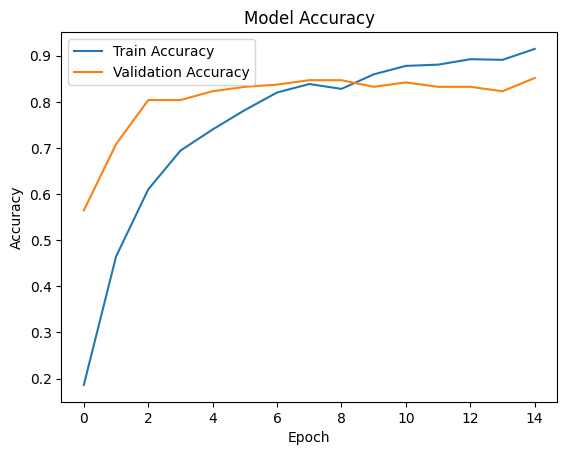

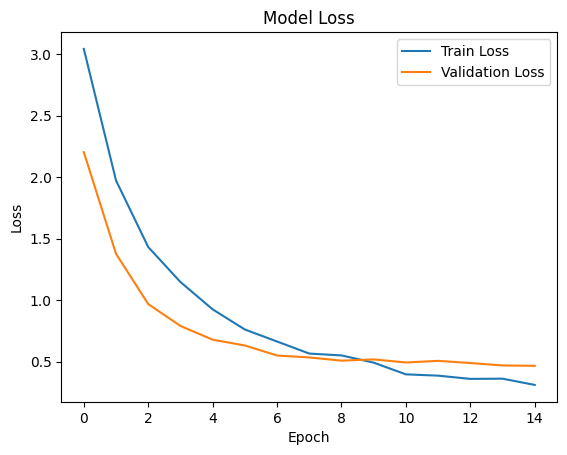

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#Testing from user input

import numpy as np
from tensorflow.keras.preprocessing import image

# Load your image (change path to your test image)
img_path = 'F:/python/tensorflow project/sample_fruit.jpg'  # Put your test image path here
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array and scale pixels
img_array = image.img_to_array(img) / 255.0

# Add batch dimension (model expects batches)
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Map predicted index to class name
class_names = train_generator.class_indices
class_names = dict((v, k) for k, v in class_names.items())  # Reverse map
print(f'Predicted class: {class_names[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: apples


Done